# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

import patsy
import statsmodels.api as sm

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
reg = smf.ols('tip ~ net_bill', data = tips).fit()

In [2]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   tip_pct     244 non-null    float64 
 8   net_bill    244 non-null    float64 
dtypes: category(4), float64(4), int64(1)
memory usage: 11.2 KB


In [3]:
# 1. Criar a matriz de design
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           2.64e-20
Time:                        14:29:18   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [4]:
# 2. Remover variáveis não significativas
# Exibir os p-values
p_values = model.pvalues
print("P-values:")
print(p_values)

# Remover variáveis com p-valor maior que 0.05
significant_vars = p_values[p_values < 0.05].index
X_significant = X[significant_vars]

# Ajustar um novo modelo com as variáveis significativas
model_significant = sm.OLS(y, X_significant).fit()
print(model_significant.summary())

P-values:
Intercept         1.389032e-06
sex[T.Female]     9.824382e-01
smoker[T.No]      3.523485e-01
time[T.Dinner]    7.287609e-01
net_bill          5.764964e-22
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        14:29:18   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std e

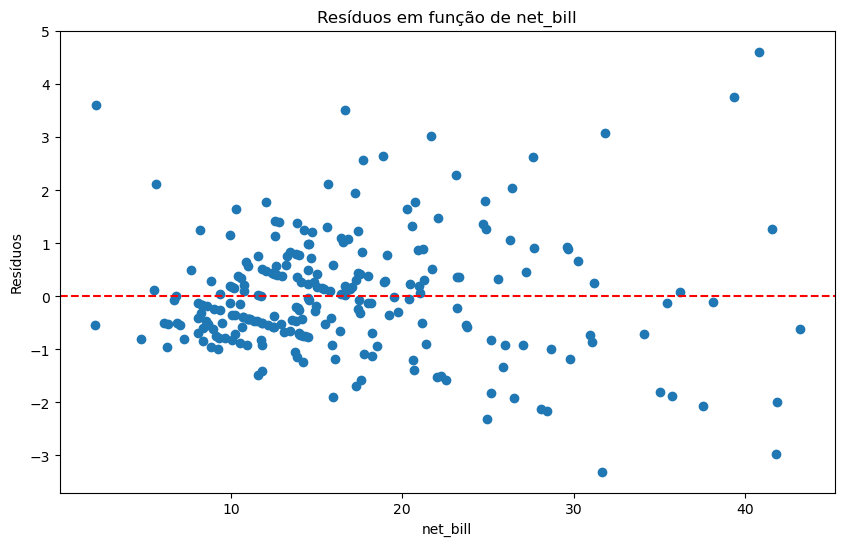

In [5]:
# 3. Gráfico de resíduos em função de net_bill
residuals = model_significant.resid
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos em função de net_bill')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.show()


In [6]:
# 5. Testar transformação de net_bill em log e polinômio
# Logar net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar modelo com log(net_bill)
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_net_bill', data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()
print("Modelo com log(net_bill):")
print(model_log.summary())


Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     25.06
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           2.41e-17
Time:                        14:29:18   Log-Likelihood:                -382.22
No. Observations:                 244   AIC:                             774.4
Df Residuals:                     239   BIC:                             791.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         

In [7]:
# Ajustar modelo com um polinômio de net_bill (de grau 2)
tips['net_bill_squared'] = tips['net_bill'] ** 2
y_poly, X_poly = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()
print("Modelo com polinômio de net_bill:")
print(model_poly.summary())



Modelo com polinômio de net_bill:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     24.15
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.22e-19
Time:                        14:29:18   Log-Likelihood:                -374.88
No. Observations:                 244   AIC:                             761.8
Df Residuals:                     238   BIC:                             782.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Interc

In [8]:
# Comparar R² dos modelos
m1 = model_significant.rsquared
m2 = model_log.rsquared
m3 = model_poly.rsquared

print(f'R² Modelo Original: {m1:.4f}')
print(f'R² Modelo Log: {m2:.4f}')
print(f'R² Modelo Polinômio: {m3:.4f}')

R² Modelo Original: 0.3325
R² Modelo Log: 0.2955
R² Modelo Polinômio: 0.3366


In [9]:
print(f'O melhor modelo é o: {max(m1, m2, m3):.4f}')

O melhor modelo é o: 0.3366


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
# Calcular o percentual da gorjeta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# 1. Criar a matriz de design para log(tip_pct)
y_log, X_log = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

#  Ajustar o modelo
model_log = sm.OLS(y_log, X_log).fit()

# Exibir o resumo do modelo
print("Modelo para log(tip_pct):")
print(model_log.summary())

Modelo para log(tip_pct):
                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           3.16e-13
Time:                        14:29:18   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         

In [11]:
# 2. Remover variáveis não significativas
# Exibir os p-values
p_values_log = model_log.pvalues
print("P-values para log(tip_pct):")
print(p_values_log)

# Remover variáveis com p-valor maior que 0.05
significant_vars_log = p_values_log[p_values_log < 0.05].index
X_significant_log = X_log[significant_vars_log]

# Ajustar um novo modelo com as variáveis significativas
model_significant_log = sm.OLS(y_log, X_significant_log).fit()
print("Modelo ajustado com variáveis significativas para log(tip_pct):")
print(model_significant_log.summary())

P-values para log(tip_pct):
Intercept         9.088983e-40
sex[T.Female]     7.467544e-01
smoker[T.No]      9.123783e-01
time[T.Dinner]    7.592793e-01
net_bill          4.838178e-15
dtype: float64
Modelo ajustado com variáveis significativas para log(tip_pct):
                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           8.27e-16
Time:                        14:29:18   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:           

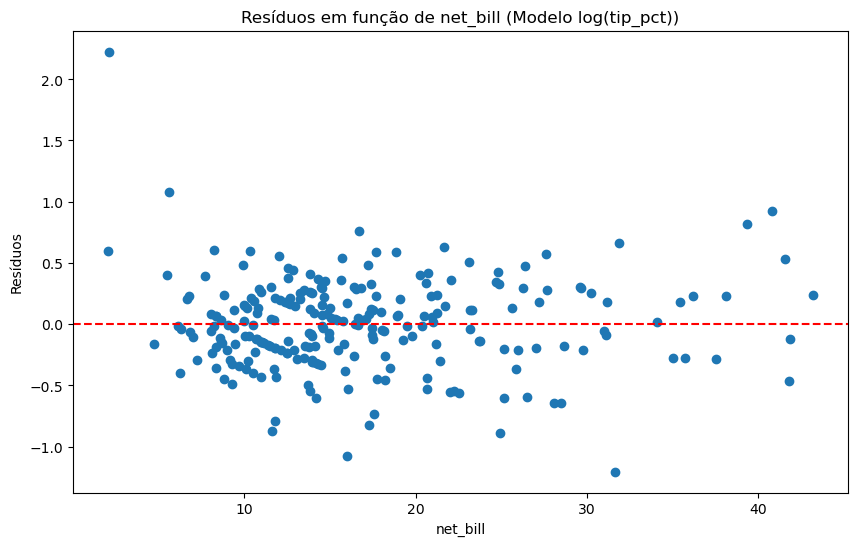

In [12]:
# 3. Gráfico de resíduos em função de net_bill
residuals_log = model_significant_log.resid
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos em função de net_bill (Modelo log(tip_pct))')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.show()

In [13]:
# 4. Testar transformação de net_bill em log e polinômio
# Logar net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar modelo com log(net_bill)
y_log_log, X_log_log = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + log_net_bill', data=tips, return_type='dataframe')
model_log_log = sm.OLS(y_log_log, X_log_log).fit()
print("Modelo com log(net_bill):")
print(model_log_log.summary())

# Ajustar modelo com um polinômio de net_bill (de grau 2)
tips['net_bill_squared'] = tips['net_bill'] ** 2
y_poly_log, X_poly_log = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly_log = sm.OLS(y_poly_log, X_poly_log).fit()
print("Modelo com polinômio de net_bill:")
print(model_poly_log.summary())


Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     24.92
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           2.94e-17
Time:                        14:29:18   Log-Likelihood:                -96.213
No. Observations:                 244   AIC:                             202.4
Df Residuals:                     239   BIC:                             219.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         

In [14]:
# 5. Comparar R² dos modelos
print(f'R² Modelo Significativo (log(tip_pct)): {model_significant_log.rsquared:.4f}')
print(f'R² Modelo Log (log(tip_pct)): {model_log_log.rsquared:.4f}')
print(f'R² Modelo Polinômio (log(tip_pct)): {model_poly_log.rsquared:.4f}')

# Calcular R² do modelo final em tip_pct
# Primeiro, obtendo os preditivos para o modelo final
tips['pred_log_tip_pct'] = model_poly_log.fittedvalues

# Convertendo os valores preditivos de volta para tip_pct
tips['pred_tip_pct'] = np.exp(tips['pred_log_tip_pct'])

# Calcular o R² para o modelo em tip_pct
r2_tip_pct_final = r2_score(tips['tip_pct'], tips['pred_tip_pct'])
print(f'R² do modelo final em tip_pct: {r2_tip_pct_final:.4f}')

# Comparar com o modelo do item 1
print(f'R² do modelo original (tip_pct): {model_significant.rsquared:.4f}')  

R² Modelo Significativo (log(tip_pct)): 0.2353
R² Modelo Log (log(tip_pct)): 0.2943
R² Modelo Polinômio (log(tip_pct)): 0.2611
R² do modelo final em tip_pct: 0.1353
R² do modelo original (tip_pct): 0.3325


In [15]:
print('Melhor modelo: original')

Melhor modelo: original


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [16]:
# Carregar a base de dados
data = pd.read_csv('../resources/previsao_de_renda(1).csv')


In [18]:
# 1.
# Verificar se há valores ausentes
print(data.isnull().sum())

# Remover observações com valores ausentes nas colunas relevantes
data_clean = data.dropna(subset=['renda', 'tempo_emprego'])

# Ajustar o modelo novamente com os dados limpos
model_simple = smf.ols('renda ~ tempo_emprego', data=data_clean).fit()

# Exibir o resumo do modelo
print("Resumo do modelo de regressão linear simples:")
#print(model_simple.summary())

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64
Resumo do modelo de regressão linear simples:


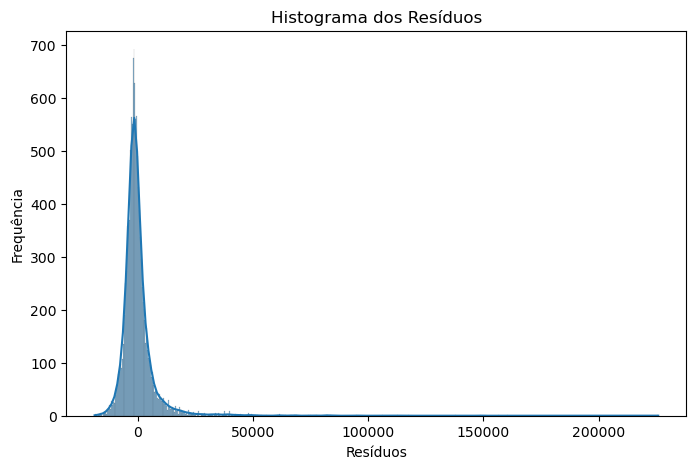

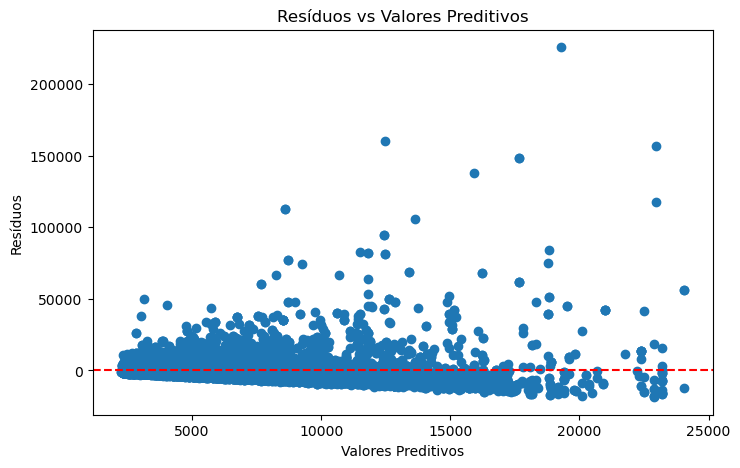

In [20]:
#2.

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calcular os resíduos
residuos = model_simple.resid

# Histograma dos resíduos
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Gráfico de dispersão dos resíduos vs valores preditos
plt.figure(figsize=(8, 5))
plt.scatter(model_simple.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs Valores Preditivos')
plt.xlabel('Valores Preditivos')
plt.ylabel('Resíduos')
plt.show()


In [41]:
#3.
# Verificar e remover valores ausentes
data_clean = data.dropna(subset=['renda', 'tempo_emprego'])

# Codificar variáveis categóricas
data_encoded = pd.get_dummies(data_clean, drop_first=True)

# Ajustar o modelo com todas as variáveis independentes
modelo_multiplo = smf.ols('np.log(renda) ~ tempo_emprego + idade + posse_de_veiculo + posse_de_imovel', data=data_encoded).fit()

# Exibir o resumo do modelo
print(modelo_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     771.9
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:47:14   Log-Likelihood:                -14937.
No. Observations:               12427   AIC:                         2.988e+04
Df Residuals:                   12422   BIC:                         2.992e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [43]:
#5
# Fazer previsões com o modelo ajustado
data_encoded['previsoes'] = modelo_multiplo.predict(data_encoded)

# Calcular os resíduos (diferença entre valor real e valor previsto)
data_encoded['residuos'] = data_encoded['renda'] - data_encoded['previsoes']

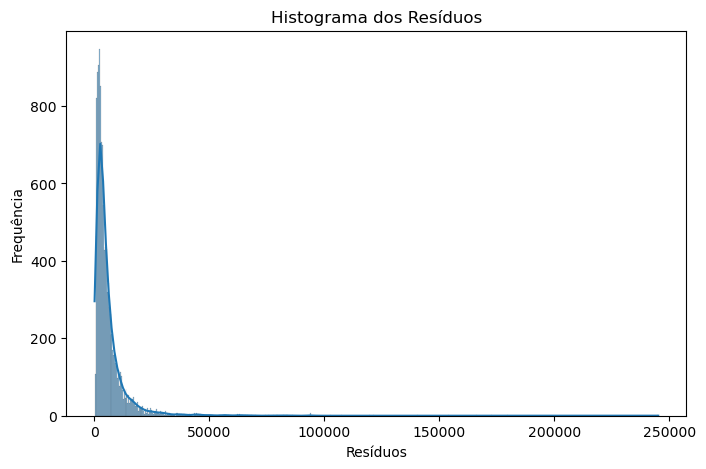

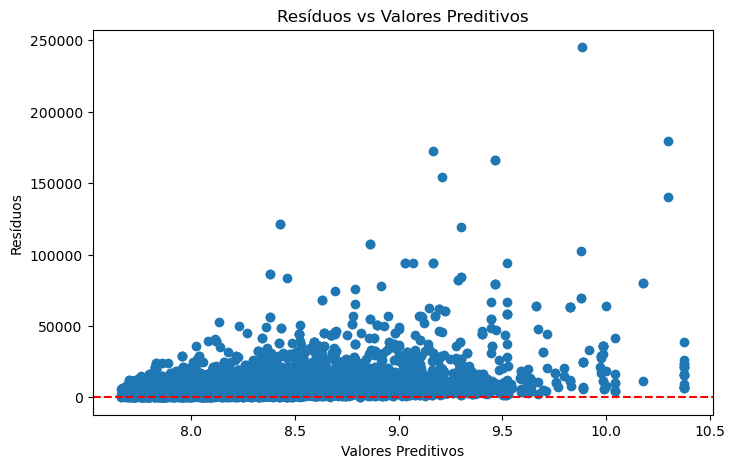

In [45]:
# 1. Histograma dos resíduos
plt.figure(figsize=(8, 5))
sns.histplot(data_encoded['residuos'], kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# 3. Gráfico de dispersão dos resíduos vs valores preditos
plt.figure(figsize=(8, 5))
plt.scatter(data_encoded['previsoes'], data_encoded['residuos'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs Valores Preditivos')
plt.xlabel('Valores Preditivos')
plt.ylabel('Resíduos')
plt.show()
